## Deep NN(5-layers) : MNIST - Keras

In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras import utils

import matplotlib.pyplot as plt

### Step 1. Data -  target class : 10

In [10]:
num_classes = 10

# Step 1. Data Load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Step 2. Deep NN Model (5-layer NN : input = 784, H1 = 512, H2 = 512, H3 = 512, H4 = 512, output = 10 with softmax)

In [11]:
# Step 2. Model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
____________________________________________

### Step 3. Loss,Optimizer, Metric

In [12]:
# Step 3. Loss,Optimizer, Metric
model.compile (optimizer= 'adam', 
                loss='categorical_crossentropy', metrics = ['accuracy'])

### Step 4. Train the model

In [13]:
# Step 4. Train the model
history=model.fit(X_train, y_train, batch_size=100, epochs=15, verbose=2,
                  validation_split=0.2)

Epoch 1/15
480/480 - 2s - loss: 0.2463 - accuracy: 0.9242 - val_loss: 0.1255 - val_accuracy: 0.9641
Epoch 2/15
480/480 - 1s - loss: 0.1048 - accuracy: 0.9685 - val_loss: 0.1102 - val_accuracy: 0.9678
Epoch 3/15
480/480 - 1s - loss: 0.0769 - accuracy: 0.9772 - val_loss: 0.1037 - val_accuracy: 0.9726
Epoch 4/15
480/480 - 1s - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.0982 - val_accuracy: 0.9737
Epoch 5/15
480/480 - 1s - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.1351 - val_accuracy: 0.9680
Epoch 6/15
480/480 - 1s - loss: 0.0426 - accuracy: 0.9877 - val_loss: 0.1104 - val_accuracy: 0.9743
Epoch 7/15
480/480 - 1s - loss: 0.0362 - accuracy: 0.9895 - val_loss: 0.1021 - val_accuracy: 0.9736
Epoch 8/15
480/480 - 1s - loss: 0.0283 - accuracy: 0.9919 - val_loss: 0.1052 - val_accuracy: 0.9747
Epoch 9/15
480/480 - 1s - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.1183 - val_accuracy: 0.9729
Epoch 10/15
480/480 - 1s - loss: 0.0235 - accuracy: 0.9932 - val_loss: 0.1065 - val_accuracy: 0.9770

### Step 5. Test the Model

In [14]:
# Step 5. Test the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss = ', test_loss, 'test_acc = ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1076 - accuracy: 0.9787
test_loss =  0.10759972780942917 test_acc =  0.9786999821662903


### Plot the Training/Validation loss

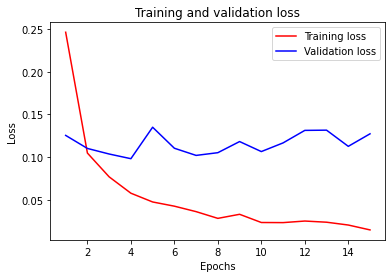

In [15]:
history_dict = history.history
#print(history_dict.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plot the Training/Validation Accuracy

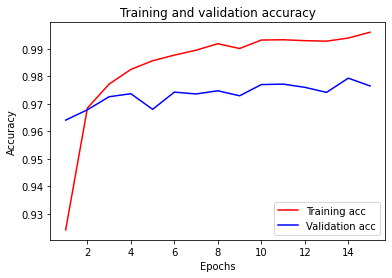

In [16]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()